## DATA 601 - Fall 2024
### Homework Assignment 4
Total points : 30<br>
 Please provide your solutions into the cells provided after question cells. You can create new cells as needed. <br>

<b>Question 1 </b> [<span style="color: red;">20 points</span>]:<br>
 The Titanic dataset is a popular dataset used in data science and machine learning. It has the information about the passengers aboard the Titanic ship before it sank.
Let us load `titanic.csv` and see what it contains.

In [63]:
# Imports
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
titanic_df = pd.read_csv('titanic.csv',index_col=0)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


You can read about the different columns over [here](https://www.kaggle.com/competitions/titanic/data).<br>
Answer the following questions on the topic:

1. Calculate the average age according to the provided data of sex (ignore missing values).
2. Find how many passengers survived and died by each class.
3. Find how many passengers embarked by each port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) were in classes 1, 2 and 3
4. Plot a bar graph where on X-axis you have : the different passenger classes (1 , 2 and 3). And on Y-axis would be the number of passengers who survived and died. Plot these bars as groups (grouped data). See `bargraph_example.ipynb` in `Week_8` for example.
5. Create a histogram of the number of people (Y axis) on the titanic by their age (X axis) you will need to clean the data by dropping the rows with missing ages. The choice of number of bins is yours (though i suggest something that avoids making the diagram look either too blocky or too thin).

See below for average age of passengers by sex:
 Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64 

See below for counts of survival and deaths of passengers by class:
    Pclass Survived  count
0       1      Yes    136
1       1       No     80
2       2       No     97
3       2      Yes     87
4       3       No    372
5       3      Yes    119 

See below for counts of passengers by class by ports of embarkation:
   Embarked  Pclass  count
0        C       1     85
5        Q       1      2
8        S       1    127
2        C       2     17
4        Q       2      3
7        S       2    164
1        C       3     66
3        Q       3     72
6        S       3    353 



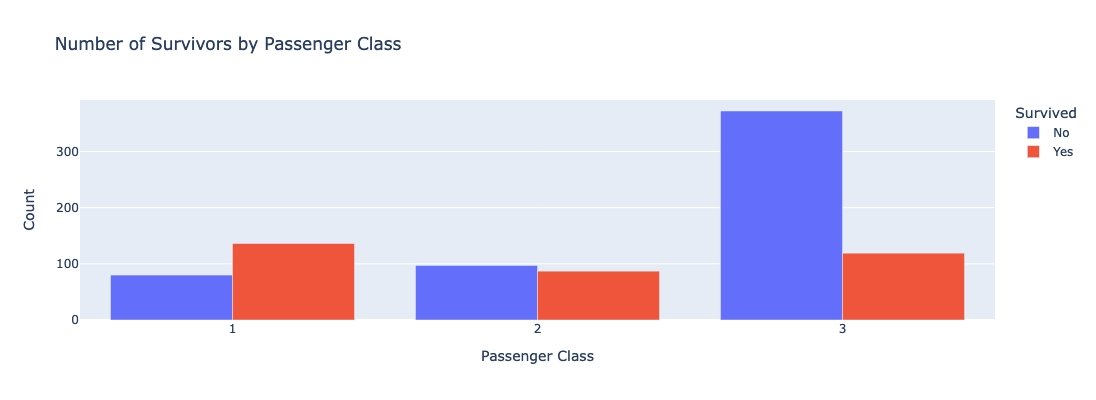

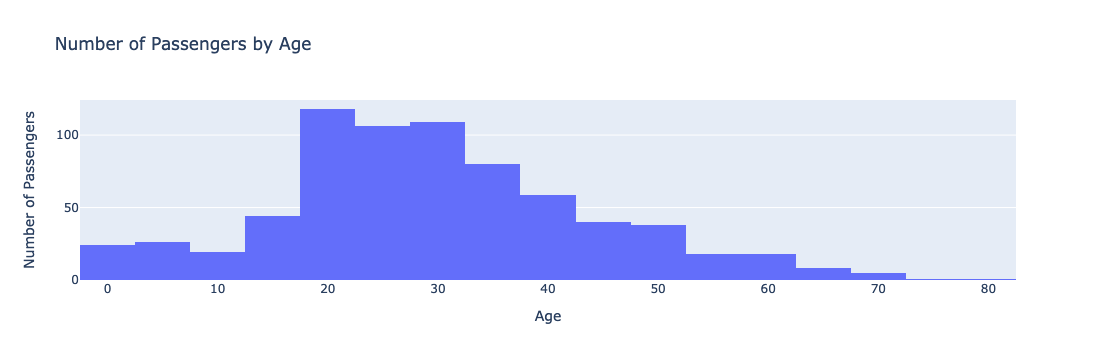

In [65]:
# 1 - Calculates the average age of passengers by sex.
titanic_df.dropna(subset='Age')
print('See below for average age of passengers by sex:\n', titanic_df.groupby('Sex')['Age'].mean(),'\n')

#2 - Calculates counts of survival and deaths of passengers by class.

# Relabels survival codes to "Yes" or "No."
def relabel_survival(code):
    if code == 1:
        return 'Yes'
    else:
        return 'No'

titanic_df_survival_by_class = titanic_df.copy()
titanic_df_survival_by_class['Survived'] = titanic_df_survival_by_class['Survived'].apply(relabel_survival)
print(
    'See below for counts of survival and deaths of passengers by class:\n', 
    titanic_df_survival_by_class.groupby('Pclass')['Survived'].value_counts().reset_index().sort_values(by='Pclass'),
    '\n')

#3 - Finds how many passengers by class embarked by each port.
titanic_df_pass_by_port = titanic_df.sort_values(by='Pclass').groupby('Embarked')['Pclass'].value_counts()
print(
    'See below for counts of passengers by class by ports of embarkation:\n', 
    titanic_df_pass_by_port.reset_index().sort_values(by='Pclass'),
    '\n')

#4 - Plots a grouped bar graph with numbers of survivors as a function of passenger class.
titanic_df_survival_by_class2 = titanic_df_survival_by_class.copy()
titanic_df_survival_by_class2 = titanic_df_survival_by_class2.groupby(['Pclass','Survived']).size().reset_index(name='Count')

fig1 = px.bar(
    titanic_df_survival_by_class2,
    x = 'Pclass',
    y = 'Count',
    color='Survived',
    title='Number of Survivors by Passenger Class',
    height = 400,
    barmode='group'
)

fig1.update_layout(
    xaxis_title='Passenger Class'
)

fig1.show()

#5 - Plots histogram of number of passengers by age.
titantic_clean_ages = titanic_df.dropna(subset='Age')

fig2 = px.histogram(
    titantic_clean_ages,
    x = 'Age',
    title='Number of Passengers by Age'
)
fig2.update_layout(
    yaxis_title='Number of Passengers'
)
fig2.show()

<b>Question 2 </b> [<span style="color: red;">10 points</span>]:<br>
Consider the two files: `AAPL_stock.csv` and `MSFT_stock.csv`. They are originally from [this kaggle dataset](https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset/) and contain the stock prices for Apple (AAPL) and Microsoft (MSFT) respectively.<br>
They look something like this...

In [67]:
df_AAPL = pd.read_csv('AAPL_stock.csv') #<---Data for Apple
df_AAPL.index = pd.to_datetime(df_AAPL.index) #Making sure the index is of datetime object
df_MSFT = pd.read_csv('MSFT_stock.csv') #<---Data for Microsoft
df_MSFT.index = pd.to_datetime(df_MSFT.index) #Making sure the index is of datetime object
#If you want to import these csv files in any other ways (say by not having index_col parameter) thats fine too

In [68]:
#How Apple looks like
df_AAPL.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
1970-01-01 00:00:00.000000000,12/12/1980,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1970-01-01 00:00:00.000000001,12/15/1980,0.488839,0.488839,0.486607,0.486607,0.385558,43971200


In [69]:
#And Microsoft
df_MSFT.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
1970-01-01 00:00:00.000000000,1986-03-13,0.088542,0.101562,0.088542,0.097222,0.062378,1031788800
1970-01-01 00:00:00.000000001,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064606,308160000


Here, each row shows the details for days where the stock market was open. The adjusted close price (Adj Close) is a variable that will be taken as the representative for the day's trading. You have to do the following:
1. Make an errorbar plot where (i) the X-axis is the year and (ii) the Y-axis shows the average Adj close price for that particular year (the vertical errorbar will display the std deviation for the particular year). Do this for years 1986 to 1996.
2. Make another errorbar plot (need not be a subplot) like the one before, but for years 1997 to 2019

---
Other requirements for both the graphs is as follows:
1. The Y-axis must start at 0
2. THe X-axis of both plots can have different intervals (since the first graph covers 10 years but the second graph covers 20+ years).
3. Label both the axes.
4. Display legends.
5. Have appropriate titles for each plot.
6. Preferably make it clear to look and aesthetically pleasing (good presentation).

In [71]:
# Clean and groupby AAPL data.
df_AAPL['Year'] = df_AAPL['Date'].apply(lambda date: date[-4:])
df_AAPL['Year'] = df_AAPL['Year'].apply(float)

df_AAPL_groupby_year_avgACP_86_96 = df_AAPL[(df_AAPL['Year'] >= 1986) & (df_AAPL['Year'] <= 1996)].groupby('Year')['Adj Close'].mean().reset_index()

df_AAPL_groupby_year_avgACP_97_19 = df_AAPL[(df_AAPL['Year'] >= 1997) & (df_AAPL['Year'] <= 2019)].groupby('Year')['Adj Close'].mean().reset_index()

# Clean and groupby MSFT data.
df_MSFT['Year'] = df_MSFT['Date'].apply(lambda date: date[0:4])
df_MSFT['Year'] = df_MSFT['Year'].apply(float)

df_MSFT_groupby_year_avgACP_86_96 = df_MSFT[(df_MSFT['Year'] >= 1986) & (df_MSFT['Year'] <= 1996)].groupby('Year')['Adj Close'].mean().reset_index()
df_MSFT_groupby_year_avgACP_97_19 = df_MSFT[(df_MSFT['Year'] >= 1997) & (df_MSFT['Year'] <= 2019)].groupby('Year')['Adj Close'].mean().reset_index()


In [72]:
# Function creates plots of adjusted close prices of AAPL and MSFT stocks as a function of time.

def make_stock_plot(df1, df2, x, x_axis_title, x_lim, y, y_axis_title, y_lim, title, labels):
    plt.figure(figsize=(13,7))
    plt.errorbar(
        df1[x],
        df1[y],
        yerr=np.std(df1[y]),
        fmt='o',
        label=labels[0]
    )
    plt.errorbar(
        df2[x],
        df2[y],
        yerr=np.std(df2[y]),
        fmt='o',
        label=labels[1]
    )
    plt.xticks(np.arange(x_lim[0],x_lim[1],1))
    plt.xlabel(x_axis_title)
    plt.ylabel(y_axis_title)
    plt.title(title)
    plt.xlim(*x_lim)
    plt.ylim(*y_lim)
    plt.legend()
    plt.show()

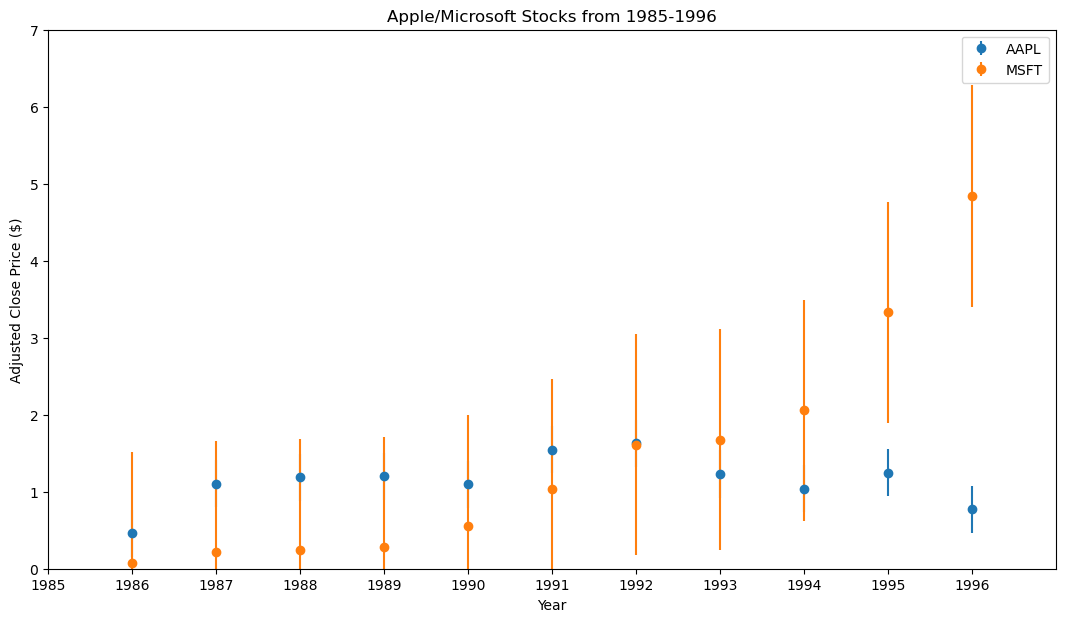

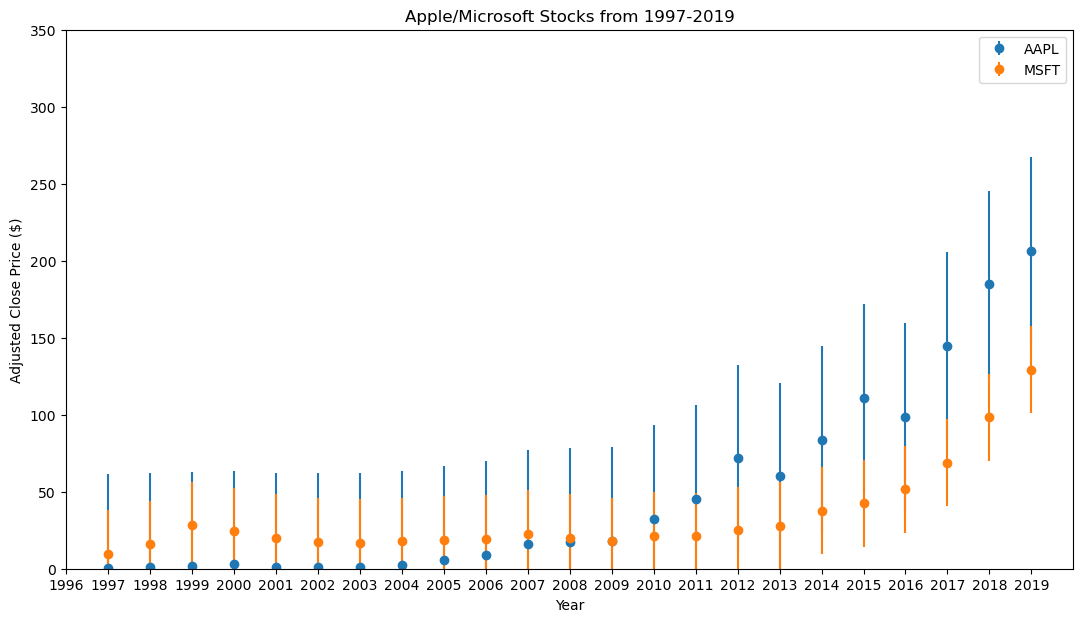

In [73]:
# Make plots
make_stock_plot(df_AAPL_groupby_year_avgACP_86_96, df_MSFT_groupby_year_avgACP_86_96,'Year','Year',[1985,1997],'Adj Close','Adjusted Close Price ($)',[0,7],"Apple/Microsoft Stocks from 1985-1996", ['AAPL','MSFT'])
make_stock_plot(df_AAPL_groupby_year_avgACP_97_19, df_MSFT_groupby_year_avgACP_97_19,'Year','Year',[1996,2020],'Adj Close','Adjusted Close Price ($)',[0,350],"Apple/Microsoft Stocks from 1997-2019", ['AAPL','MSFT'])
